# VIVENDO Customer Claims and Compensation Data Analysis

## Background Study
Vivendo is a fast food chain in Brazil with over 200 outlets.
Customers often claim compensation from the company for food poisoning.
The legal team processes these claims in ther four offices locations namely; *RECIFE, SAO LUIS, FORTALEZA* and *NATAL*.

The legal team needs a report on how long it takes close customer claims and recommendation on how to improve on it.
The head of the legal department wants a report on how each location differs in the time it
takes to close claims.


In [4]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')

## About Dataset

In [5]:
# import dataset as dataframe
df = pd.read_csv('food_claims_2212.csv')
# dataset preview
df.sample(5)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
1770,1771,168,R$ 5829.51,3938.12,SAO LUIS,3,True,vegetable
1984,1985,146,R$ 13356.38,10636.72,FORTALEZA,4,False,meat
263,264,193,R$ 30726.17,24351.11,SAO LUIS,7,NaN,unknown
1669,1670,187,R$ 55725.99,50889.44,NATAL,15,True,unknown
736,737,133,R$ 12283.27,8792.48,FORTALEZA,4,False,meat


The given dataset has information about recorded claims made by customers on food poisoning. It has 2000 entries each representaing unique claims alongside 8 attributes which includes:  claim_id,time_to_close, claim_amount, amount_paid, location, individuals_on_claim, linked_cases and cause.

### Field/Column Descriptions

|**Field/Column**|**Description**|
|:----| :-----|
|claim_id |Nominal. The unique identifier of the claim|
|time_to_close|Discrete. The number of days to close the claim.|
|claim_amount|Continuous. The initial claim requested in the currency of Brazil.|
|amount_paid|Continuous. Final amount paid. In the currency of Brazil.|
|location|Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”,“FORTALEZA”, or “NATAL”|
|individuals_on_claim|Discrete. Number of individuals on this claim. Minimum 1 person|
|linked_cases|Nominal. Whether this claim is linked to other cases.|
|cause|Nominal. Cause of the food poisoning. One of “vegetable”, “meat” or “unknown”.|

In [3]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [4]:
# Data summary analysis
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


In [5]:
df.dtypes

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

In [6]:
df.shape

(2000, 8)

## Observed data quality Issues
* Wrong data types on the following columns; claim_id, claim_amount, claim_amount,linked_cases and cause.
* Unwanted symbol that can affect analysis on 'claim_amount' column
* Missing values on 'amount_paid' and 'linked_cases'
* Improper description of column headings with currency values

## Data Cleaning

In [7]:
# Create a copy of the dataset
df_copy = df.copy

In [8]:
# Transform claim_id datatype to categorical type
df['claim_id'] = df['claim_id'].astype('category')

In [9]:
# Strip the 'R$' in 'claim_amount' 
df['claim_amount'] = df['claim_amount'].str.strip('R$' )
# convert datatype to float and round to 2 decimal place
df['claim_amount'] = df['claim_amount'].astype('float').round(decimals = 2)
assert df['claim_amount'].dtype == float

* amount_paid column 

In [10]:
# Fill Nan values with overall mean of each group
group_mean = df.groupby('location')['amount_paid'].mean()
#Fill na values with group median
df['amount_paid'] = df.set_index('location')['amount_paid'].fillna(group_mean).values
df['amount_paid'] = df['amount_paid'].round(decimals = 2)
assert df['amount_paid'].isna().any() == False

* location column 

In [11]:
# Transform to categorical datatype
df['location'] = df['location'].astype('category')
assert df['location'].dtype == 'category'

* linked cases

In [12]:
# Replace True with 1 and False with 0
df['linked_cases'] = np.where(df['linked_cases'] == True, 1, 0)
df['linked_cases'] = df['linked_cases'].astype('category')

* cause column

In [13]:
# checking unique values
df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [14]:
# Remove cause of repeated values and convert to categorical variable
df['cause'] = df['cause'].str.lower().str.strip().str.replace('vegetables','vegetable')
df['cause'] = df['cause'].astype('category')

In [15]:
# Check for effect
df['cause'].unique()

['unknown', 'meat', 'vegetable']
Categories (3, object): ['meat', 'unknown', 'vegetable']

In [16]:
# Confirmatory check of the cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   claim_id              2000 non-null   category
 1   time_to_close         2000 non-null   int64   
 2   claim_amount          2000 non-null   float64 
 3   amount_paid           2000 non-null   float64 
 4   location              2000 non-null   category
 5   individuals_on_claim  2000 non-null   int64   
 6   linked_cases          2000 non-null   category
 7   cause                 2000 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 153.0 KB


In [17]:
# Random sampling of 5 rows
df.sample(5)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
1761,1762,191,30722.02,23125.27,RECIFE,7,0,unknown
1370,1371,167,6758.43,5811.08,RECIFE,2,1,unknown
1722,1723,154,39549.41,31866.39,SAO LUIS,13,0,meat
1711,1712,137,19860.67,16329.90,RECIFE,7,0,meat
43,44,189,22790.60,20273.70,NATAL,8,0,meat


# Exploratory Data Analysis
Exploration of dataset to uncover insights.

In [18]:
df.groupby('location')['claim_amount'].sum()

location
FORTALEZA     8294581.01
NATAL         7914729.79
RECIFE       24116530.58
SAO LUIS     13988089.09
Name: claim_amount, dtype: float64

In [19]:
df.groupby('location')['amount_paid'].sum()

location
FORTALEZA     6597201.14
NATAL         6227350.95
RECIFE       19119139.19
SAO LUIS     11139703.06
Name: amount_paid, dtype: float64

In [20]:
# The number of claims in each location
claims_by_id = df.location.value_counts()
claims_by_id

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

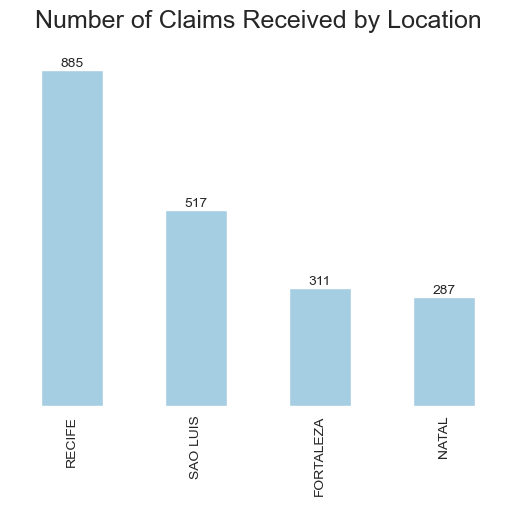

In [21]:
# bar plot of claims_by_id
fig,ax =plt.subplots()
ax = claims_by_id.plot(kind = 'bar', colormap = 'Paired')
sns.despine(bottom =True, left = True)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_yticks([])
ax.set_title("Number of Claims Received by Location", fontsize = 18)
ax.margins(y= 0.1)

In [22]:
df['location'].value_counts(normalize = True) * 100

RECIFE       44.25
SAO LUIS     25.85
FORTALEZA    15.55
NATAL        14.35
Name: location, dtype: float64

Text(0.5, 0, 'Days to Close Claims')

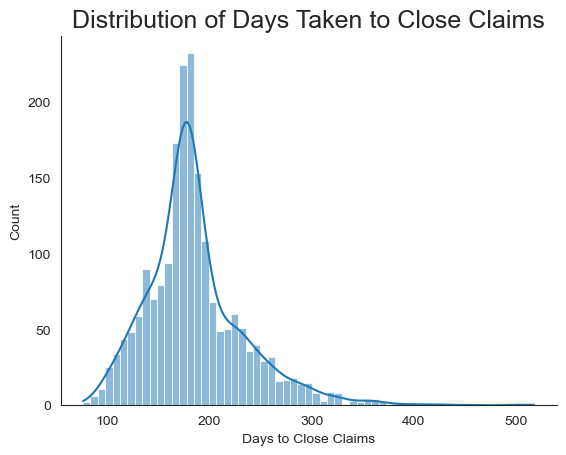

In [23]:
#Distribution of time to close claims
ax2 = sns.histplot(data = df, x = 'time_to_close', kde =True, palette= 'paired')
sns.despine()
ax2.set_title("Distribution of Days Taken to Close Claims", fontsize = 18)
ax2.set_xlabel("Days to Close Claims")

The disribution of the days it takes VIVENDO legal team to close claims is Unimodal and right skewed with observed outliers that takes more than 400 days to close. Recorded days taken to close claims ranges from 76 - 518 days. The distribution somewhat symetrical and has a major peak at 180-190 days, thus most of the claims are closed between these days.

What is the distribution of time to close claim accross locations?

Text(0.5, 1.0, 'Distribution of Days Taken to Close Claims by Location')

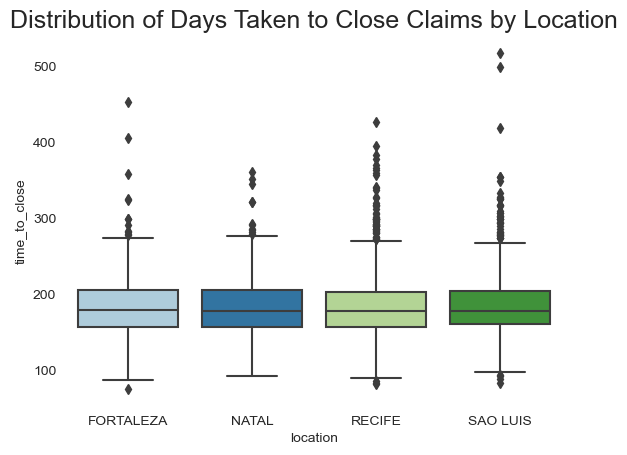

In [24]:
ax3 = sns.boxplot(data = df, y = 'time_to_close',x = 'location', palette = 'Paired',)
sns.despine(left = True, bottom = True)
ax3.set_title("Distribution of Days Taken to Close Claims by Location", fontsize = 18)


Surprisingly, all 4 locations have a similar distribution of time to close customer claims on poisoning. Similar spread and median. Outliers can also be observed in all the locations. but SAO LUIS has a wider range of outliers.

In [25]:
q1 =  df['time_to_close'].quantile(0.25)
q3 =  df['time_to_close'].quantile(0.75)
iqr = q3-q1

In [26]:
outlier = df[df['time_to_close']>= 1.5 * iqr + q3]

In [27]:
outlier.cause.value_counts(normalize = True)

unknown      0.637931
meat         0.344828
vegetable    0.017241
Name: cause, dtype: float64

In [28]:
outlier.linked_cases.value_counts()

0    116
1      0
Name: linked_cases, dtype: int64

In [29]:
outlier.individuals_on_claim.value_counts()

15    24
14    22
13    17
12    16
11    13
10     9
9      7
8      5
7      2
6      1
Name: individuals_on_claim, dtype: int64

A closer look at the outliers reveal that the outlier records are characterized by attributes that significantly result in extended days to close claims and this explains why they are outliers.

In [30]:
#what variables or attributs have strong relationship with time to close claims

In [31]:
df['cause'].value_counts(normalize = True) * 100

meat         47.85
unknown      35.65
vegetable    16.50
Name: cause, dtype: float64

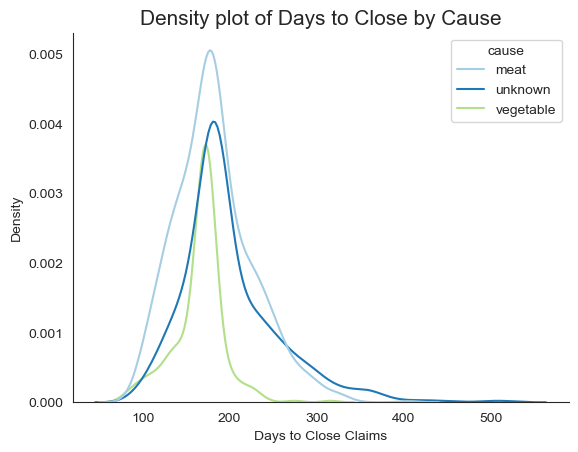

In [32]:
# kde plot of time to close by causes
ax = sns.kdeplot(data = df, x = 'time_to_close',hue = 'cause', palette = 'Paired')
ax.set_title("Density plot of Days to Close by Cause", fontsize = 15)
ax.set_xlabel("Days to Close Claims")
sns.despine()

In [33]:
df.groupby('cause')['time_to_close'].median()

cause
meat         178.0
unknown      186.0
vegetable    170.0
Name: time_to_close, dtype: float64

It can be seen from the above distribution plot that averagely, it takes more days to close claims with unknown cause. Most of the Unknown cases can be found in RECIFE. One will therefore expect Recife to have a longer closing days than other outlets as all odds are aginst Recife. It is still a surprise that on average, it shares close range of number of days close with other outlets.

In [34]:
df.groupby('location')['time_to_close'].median()

location
FORTALEZA    180.0
NATAL        179.0
RECIFE       178.0
SAO LUIS     179.0
Name: time_to_close, dtype: float64

So what variable have direct impact on time to close

In [35]:
# Determine coeffocinet of correlation 
df.corr()

,time_to_close,claim_amount,amount_paid,individuals_on_claim
time_to_close,1.000000,0.696765,0.661819,0.608790
claim_amount,0.696765,1.000000,0.965507,0.843402
amount_paid,0.661819,0.965507,1.000000,0.855734
individuals_on_claim,0.608790,0.843402,0.855734,1.000000


individuals on claim, amount paid and claim amount all affect time to close positively. Below visualizations confirms .

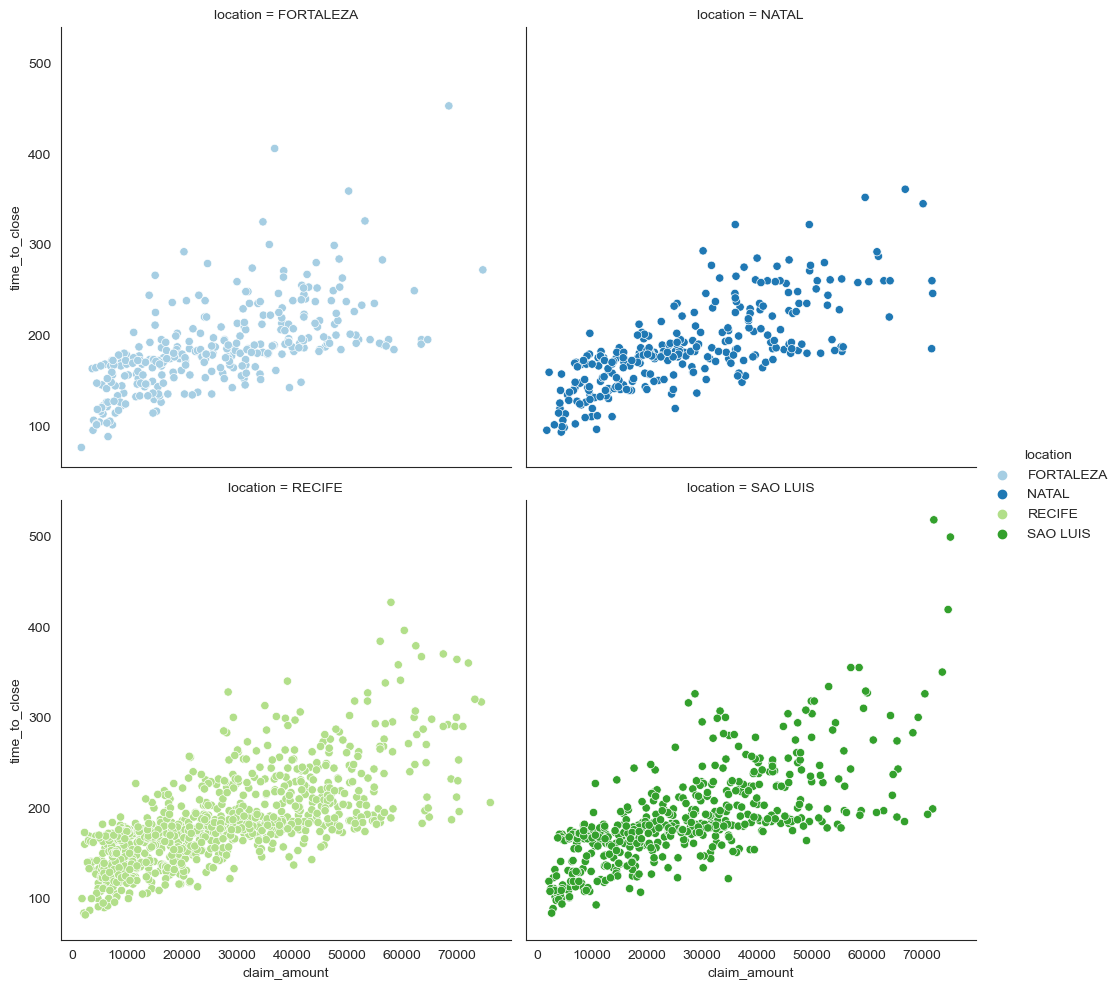

In [36]:
sns.relplot(data = df, y = 'time_to_close', x ='claim_amount', col = 'location', col_wrap = 2, hue = 'location', palette = 'Paired')

There is a positive correlation between time to close claims and claim amount accross all the locations. Thus, the higher the claim amount, the more days it takes to close and get back to customers.

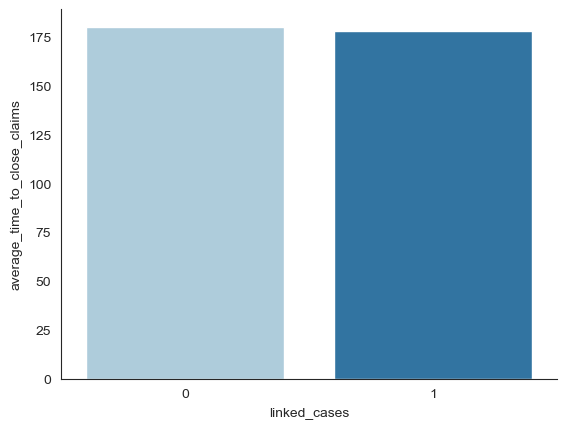

In [37]:
grp1 = df.groupby('linked_cases').agg(average_time_to_close_claims=("time_to_close","median")).reset_index()
sns.barplot(data = grp1,x = 'linked_cases', y ='average_time_to_close_claims' ,palette = 'Paired')
sns.despine()

In [38]:
df.groupby(['location','linked_cases']).agg(average_time_to_close_claims=("time_to_close","median"))

average_time_to_close_claims
location  linked_cases                              
FORTALEZA 0                                    186.0
          1                                    179.0
NATAL     0                                    180.0
          1                                    177.0
RECIFE    0                                    177.0
          1                                    178.0
SAO LUIS  0                                    182.5
          1                                    177.0

Averagely, all the recorded claims in all locations, the time it takes to close claims is slightly higher for unlinked cases than linked cases. This is maintained accross all the locations except RECIFE that averagely takes slightly higher days to close linked cases than unlinked cases

In [39]:
df['linked_cases'].value_counts(normalize = 1)

0    0.7595
1    0.2405
Name: linked_cases, dtype: float64

Only 24% of the claims are linked to other cases.

In [49]:
#Below shows how linked cases are spread over each location
df.groupby(['location','linked_cases'])['linked_cases'].count()


location   linked_cases
FORTALEZA  0               237
           1                74
NATAL      0               223
           1                64
RECIFE     0               669
           1               216
SAO LUIS   0               390
           1               127
Name: linked_cases, dtype: int64

Above shows how linked cases are spread over each location and RECIFE still have the highest proportion of unlinked cases

<AxesSubplot:ylabel='cause'>

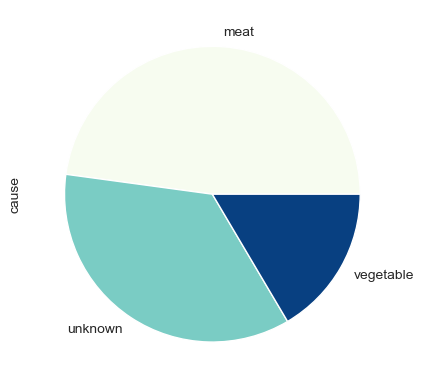

In [41]:
df['cause'].value_counts(normalize = True).plot(kind = 'pie', colormap = 'GnBu')

Meat is the leading cause of food poisoning in Vivendo fast food outlet whuch covers about 47% followed by unknown cases that accounts for 37% of the reported cases

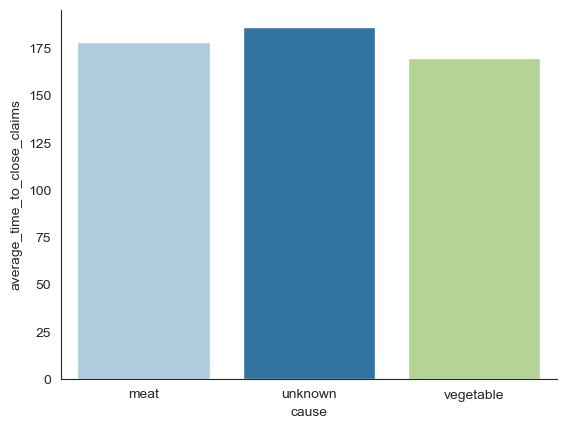

In [43]:
grp2 = df.groupby(['cause']).agg(average_time_to_close_claims=("time_to_close","median")).reset_index()
sns.barplot(data = grp2, x = 'cause', y = 'average_time_to_close_claims',palette = 'Paired')
sns.despine()

In [44]:
grp2 = df.groupby(['location','cause']).agg(average_time_to_close_claims=("time_to_close","median")).reset_index()

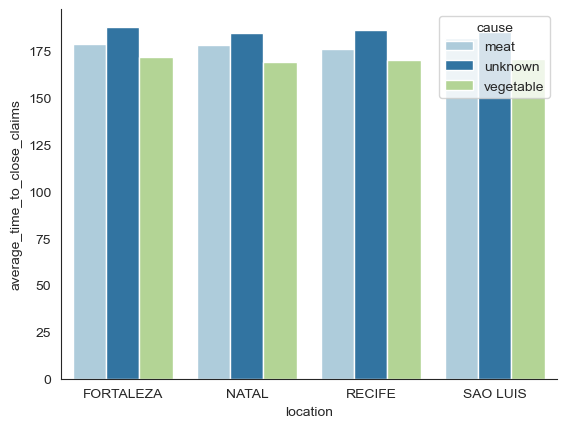

In [48]:
sns.barplot(data = grp2, x = 'location', y = 'average_time_to_close_claims', hue ='cause', palette ='Paired' )
sns.despine()

Uknown cause of the reported food poisoning cases takes more days to close and this is most probably due to its uncertainity. And this is maintained accross all locations 

In [46]:
df['claim_paid-diff'] = df['claim_amount'] - df['amount_paid']

In [47]:
df.groupby('location').agg(claim_sum= ("claim_amount","sum"),paid_sum = ('amount_paid', 'sum'),difference = ('claim_paid-diff','sum'),average_diff = ('claim_paid-diff','median')).reset_index()

,location,claim_sum,paid_sum,difference,average_diff
0,FORTALEZA,8294581.01,6597201.14,1697379.87,4509.29
1,NATAL,7914729.79,6227350.95,1687378.84,4452.66
2,RECIFE,24116530.58,19119139.19,4997391.39,4181.98
3,SAO LUIS,13988089.09,11139703.06,2848386.03,3892.42


FORTALEZA legal team received total claim sum of 8294581.01 and has paid 8294581.01, saving the company  4509.29 R$

## Conclusion and Recommendation
* RECIFE Legal team received 44% of the total claims from customers, which is the highest when compared with the legal teams in other locations. SAO LUIS, the second-highest, received 26% of the total claims received by Vivendo. Thus, the number of claims received is not balanced across locations.

* On average, Vivendo takes 189 days to process claims and get back to customers on the compensation amount, regardless of location. Despite the uneven distribution of the number of claims received by the legal team across locations, all four locations share a very close average number of days to close claims, ranging from 178-180 Days.

* There are two identified causes of reported food poisoning cases, namely Meat and Vegetables. Other unidentified causes are recorded as "Unknown," and this accounts for about 64% of the reported cases, while meat causes 34% and vegetables caused less than 5%.

* Across all locations, it takes more days to close unlinked cases and claims with unknown cause of food poisoning.

* Vivendo has lost R$43.08M to food claims and compensation, reports should be sent to the food processing department to resolve these issues. Vivendo should employ food safety techniques, standardize food processing equipment, and educate employees on the importance of maintaining good hygiene practices.

* If Vivendo's legal outlets are based on proximity to restaurant locations, the company should consider assigning the most efficient legal team to locations that receive a higher number of claims to process.

* More information about staff strength is needed to distribute legal members effectively to locations that receive more claims to process.

* It is essential to investigate why Vivendo is receiving such a high number of claims, particularly in Recife. The cause of the food poisoning should be identified, and corrective and preventive actions should be implemented.
